# Klasifikasi Migrain menggunakan Data for Migraine Classification dengan KNN

# 1) Mengumpulkan Data

# 2) Menelaah Data
- Load Library yang diperlukan.
- Load Dataset.
- Memberi nama header atribut atau fitur (jika belum ada).
- Menganalisa tipe dan relasi data (melihat tipe dataset, ukuran dataset, distribusi class, deskripsi dataset).
- Memberikan laporan atau kesimpulan dari kegiatan menelaah data.
    

In [527]:
# Load Library yang diperlukan

import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import confusion_matrix
from sklearn.neighbors import KNeighborsClassifier
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import missingno

from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

In [574]:
# Load Dataset
df = pd.read_csv("data.csv")
df.head()

,Age,Duration,Frequency,Location,Character,Intensity,Nausea,Vomit,Phonophobia,Photophobia,...,Vertigo,Tinnitus,Hypoacusis,Diplopia,Defect,Ataxia,Conscience,Paresthesia,DPF,Type
0,30,1,5,1,1,2,1,0,1,1,...,0,0,0,0,0,0,0,0,0,Typical aura with migraine
1,50,3,5,1,1,3,1,1,1,1,...,1,0,0,0,0,0,0,0,0,Typical aura with migraine
2,53,2,1,1,1,2,1,1,1,1,...,0,0,0,0,0,0,0,0,0,Typical aura with migraine
3,45,3,5,1,1,3,1,0,1,1,...,1,0,0,0,0,0,0,0,0,Typical aura with migraine
4,53,1,1,1,1,2,1,0,1,1,...,0,0,0,0,0,0,0,0,1,Typical aura with migraine


In [575]:
# Menganalisa tipe dan relasi data
# Melihat tipe dataset
type(df)

pandas.core.frame.DataFrame

In [576]:
# Melihat ukuran dataset
print(df.shape)

(400, 24)


In [577]:
# Melihat informasi tipe data semua kolom
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 24 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   Age          400 non-null    int64 
 1   Duration     400 non-null    int64 
 2   Frequency    400 non-null    int64 
 3   Location     400 non-null    int64 
 4   Character    400 non-null    int64 
 5   Intensity    400 non-null    int64 
 6   Nausea       400 non-null    int64 
 7   Vomit        400 non-null    int64 
 8   Phonophobia  400 non-null    int64 
 9   Photophobia  400 non-null    int64 
 10  Visual       400 non-null    int64 
 11  Sensory      400 non-null    int64 
 12  Dysphasia    400 non-null    int64 
 13  Dysarthria   400 non-null    int64 
 14  Vertigo      400 non-null    int64 
 15  Tinnitus     400 non-null    int64 
 16  Hypoacusis   400 non-null    int64 
 17  Diplopia     400 non-null    int64 
 18  Defect       400 non-null    int64 
 19  Ataxia       400 non-null    

In [579]:
# Melihat distribusi Class label (apa saja jenisnya)
df['Type'].unique()

array(['Typical aura with migraine', 'Migraine without aura',
       'Basilar-type aura', 'Sporadic hemiplegic migraine',
       'Familial hemiplegic migraine', 'Other',
       'Typical aura without migraine'], dtype=object)

In [580]:
# Melihat distribusi Class label (jumlahnya tiap Class)
df['Type'].value_counts()

Typical aura with migraine       247
Migraine without aura             60
Familial hemiplegic migraine      24
Typical aura without migraine     20
Basilar-type aura                 18
Other                             17
Sporadic hemiplegic migraine      14
Name: Type, dtype: int64

Text(0.5, 1, 'Distribusi Penderita Migraine')

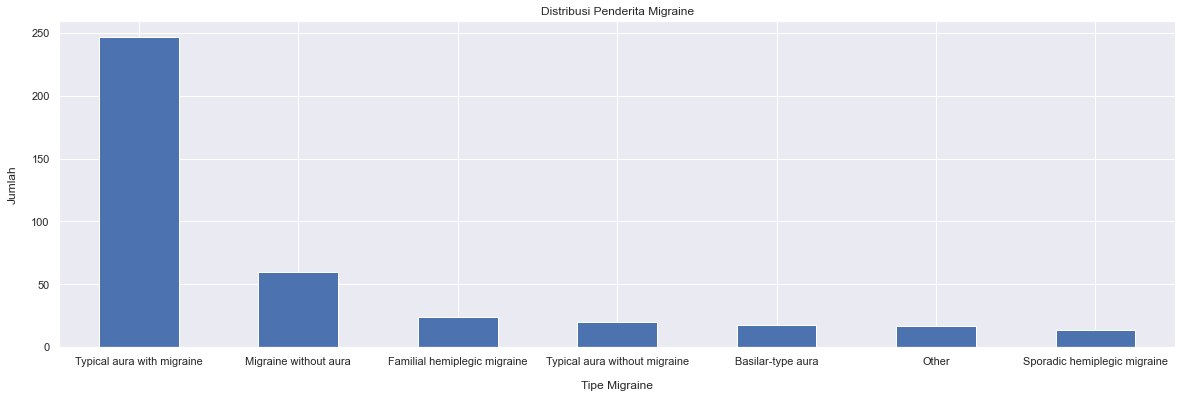

In [581]:
# Melihat distribusi class (visualisasi diagram batang dengan library seaborn)

sns.set(font_scale=1)
df['Type'].value_counts().plot(kind='bar', figsize=(20,6), rot=0)
plt.xlabel("Tipe Migraine", labelpad=14)
plt.ylabel("Jumlah", labelpad=14)
plt.title("Distribusi Penderita Migraine", y=1)

In [582]:
# Melihat deskripsi dataset
df.describe()

,Age,Duration,Frequency,Location,Character,Intensity,Nausea,Vomit,Phonophobia,Photophobia,...,Dysarthria,Vertigo,Tinnitus,Hypoacusis,Diplopia,Defect,Ataxia,Conscience,Paresthesia,DPF
count,400.000000,400.000000,400.000000,400.000000,400.000000,400.00000,400.000000,400.000000,400.000000,400.000000,...,400.0000,400.000000,400.000000,400.000000,400.000000,400.000000,400.0,400.000000,400.000000,400.000000
mean,31.705000,1.610000,2.365000,0.972500,0.977500,2.47000,0.987500,0.322500,0.977500,0.980000,...,0.0025,0.125000,0.060000,0.015000,0.005000,0.015000,0.0,0.017500,0.007500,0.410000
std,12.139043,0.770964,1.675947,0.268186,0.277825,0.76849,0.111242,0.468019,0.148489,0.140175,...,0.0500,0.331133,0.237784,0.121705,0.070622,0.121705,0.0,0.131289,0.086385,0.492449
min,15.000000,1.000000,1.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,...,0.0000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000
25%,22.000000,1.000000,1.000000,1.000000,1.000000,2.00000,1.000000,0.000000,1.000000,1.000000,...,0.0000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000
50%,28.000000,1.000000,2.000000,1.000000,1.000000,3.00000,1.000000,0.000000,1.000000,1.000000,...,0.0000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000
75%,40.000000,2.000000,4.000000,1.000000,1.000000,3.00000,1.000000,1.000000,1.000000,1.000000,...,0.0000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,1.000000
max,77.000000,3.000000,8.000000,2.000000,2.000000,3.00000,1.000000,1.000000,1.000000,1.000000,...,1.0000,1.000000,1.000000,1.000000,1.000000,1.000000,0.0,1.000000,1.000000,1.000000


Laporan atau Kesimpulan
================================================================
- Jumlah fitur 24 dengan jumlah record data 400.
- Jumlah distribusi class Typical aura with migraine -> 247, Migraine without aura -> 60, Familial hemiplegic migraine -> 24, Typical aura without migraine -> 20, Basilar-type aura -> 18, Sporadic hemiplegic migraine -> 14, dan Other Migraine -> 17.

# 3) Memvalidasi Data
- Merubah fitur yang mempunyai missing value menjadi ber-nilai NaN



# 4) Menentukan Objek Data
- Tidak masuk dalam soal

# 5) Membersihkan Data
- Perbaiki nilai yang hilang.
- Hapus data duplikat.
- Cek fitur yang bernilai konstant.

In [583]:
# Menghapus Data Duplikat
# Melihat ukuran baris dan kolom dataframe
df.shape

(400, 24)

In [584]:
# Menghapus Data Duplikat dan melihat kembali ukuran baris & kolom dataframe
df = df.drop_duplicates()
df.shape

(394, 24)

Terdapat 6 data yang sama dan sudah dilakukan pembersihan.

In [585]:
# Menghapus fitur yang bernilai konstant
df = df.loc[:, df.apply(pd.Series.nunique) !=1]
df.shape

(394, 23)

Terdapat 1 fitur yang bernilai konstant dan sudah dilakukan pembersihan.

# 6) Mengkonstruksi Data
- Representasi fitur dan merubah tipenya.
- Membagi data menjadi training dan testing.
- Membandingkan Data Original, Data Normalisasi, Data Original PCA, Data Normalisasi PCA


In [586]:
# Mengecek Representasi Fitur
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 394 entries, 0 to 399
Data columns (total 23 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   Age          394 non-null    int64 
 1   Duration     394 non-null    int64 
 2   Frequency    394 non-null    int64 
 3   Location     394 non-null    int64 
 4   Character    394 non-null    int64 
 5   Intensity    394 non-null    int64 
 6   Nausea       394 non-null    int64 
 7   Vomit        394 non-null    int64 
 8   Phonophobia  394 non-null    int64 
 9   Photophobia  394 non-null    int64 
 10  Visual       394 non-null    int64 
 11  Sensory      394 non-null    int64 
 12  Dysphasia    394 non-null    int64 
 13  Dysarthria   394 non-null    int64 
 14  Vertigo      394 non-null    int64 
 15  Tinnitus     394 non-null    int64 
 16  Hypoacusis   394 non-null    int64 
 17  Diplopia     394 non-null    int64 
 18  Defect       394 non-null    int64 
 19  Conscience   394 non-null    

In [587]:
# Membagi Training dan Testing
X = df.iloc[:,0:22]
y = df['Type']

# Menampilkan X
X.head()

,Age,Duration,Frequency,Location,Character,Intensity,Nausea,Vomit,Phonophobia,Photophobia,...,Dysphasia,Dysarthria,Vertigo,Tinnitus,Hypoacusis,Diplopia,Defect,Conscience,Paresthesia,DPF
0,30,1,5,1,1,2,1,0,1,1,...,0,0,0,0,0,0,0,0,0,0
1,50,3,5,1,1,3,1,1,1,1,...,0,0,1,0,0,0,0,0,0,0
2,53,2,1,1,1,2,1,1,1,1,...,0,0,0,0,0,0,0,0,0,0
3,45,3,5,1,1,3,1,0,1,1,...,0,0,1,0,0,0,0,0,0,0
4,53,1,1,1,1,2,1,0,1,1,...,0,0,0,0,0,0,0,0,0,1


In [588]:
# Menampilkan y
y.head()

0    Typical aura with migraine
1    Typical aura with migraine
2    Typical aura with migraine
3    Typical aura with migraine
4    Typical aura with migraine
Name: Type, dtype: object

# Data Original

In [589]:
# Membagi data menjadi training = 70% dan testing = 30%
X_train, X_test, Y_train, Y_test = train_test_split(X,y, test_size=0.3, random_state=2022)

In [590]:
# Menampilkan Data
X_train.head()

,Age,Duration,Frequency,Location,Character,Intensity,Nausea,Vomit,Phonophobia,Photophobia,...,Dysphasia,Dysarthria,Vertigo,Tinnitus,Hypoacusis,Diplopia,Defect,Conscience,Paresthesia,DPF
275,22,1,2,1,1,3,1,0,1,1,...,0,0,0,0,0,0,0,0,0,0
80,21,2,1,1,1,2,1,1,1,1,...,0,0,0,0,0,0,0,0,0,0
148,45,1,2,1,1,2,1,0,1,1,...,0,0,0,0,0,0,0,0,0,0
86,27,2,1,1,1,3,1,0,1,1,...,0,0,0,0,0,0,0,0,0,0
68,33,2,5,1,1,2,1,1,1,1,...,0,0,0,0,0,0,0,0,0,0


# Data Normalisasi

In [591]:
# Normalisasi menggunakan StandardScaler
X_norm = StandardScaler().fit_transform(X)

In [592]:
# Melihat hasil normalisasi dengan StandardScaler
X_norm

array([[-0.13934515, -0.80205898,  1.57716522, ..., -0.1344911 ,
        -0.08759357, -0.83125635],
       [ 1.50442695,  1.78819708,  1.57716522, ..., -0.1344911 ,
        -0.08759357, -0.83125635],
       [ 1.75099277,  0.49306905, -0.81745172, ..., -0.1344911 ,
        -0.08759357, -0.83125635],
       ...,
       [-0.30372236,  1.78819708, -0.21879749, ..., -0.1344911 ,
        -0.08759357,  1.20299832],
       [-0.9612312 ,  1.78819708, -0.81745172, ..., -0.1344911 ,
        11.41636253,  1.20299832],
       [ 0.43597509, -0.80205898, -0.81745172, ...,  7.43543639,
        -0.08759357,  1.20299832]])

In [593]:
X_train_norm, X_test_norm, Y_train_norm, Y_test_norm = train_test_split(X_norm,y, test_size=0.3, random_state=2022)

# Data Original PCA

In [594]:
pca = PCA(random_state=2022)
pca.fit(X)
ori_pca_array = pca.transform(X)
ori_pca = pd.DataFrame(ori_pca_array)
print("Heads of Original_PCA:",ori_pca.head())
var_ratio = pca.explained_variance_ratio_
print("\n Explained Variance Ratio:",var_ratio)
sv = pca.singular_values_
print("\n Singular Value:",sv)

Heads of Original_PCA:           0         1         2         3         4         5         6   \
0  -1.671180  2.520525  0.627314 -1.183776  1.053385  1.083079 -0.609405   
1  18.330252  2.411185  0.719916  1.135111  0.242121  0.991005 -0.337058   
2  21.282928 -1.607946  0.210455  0.433162  0.339424 -0.666265 -0.171315   
3  13.331469  2.388001  0.876194  1.059712  0.633433  1.904680 -0.778415   
4  21.298492 -2.172504  1.897530 -0.079135 -1.091071 -0.041029  0.163208   

         7         8         9   ...        12        13        14        15  \
0 -0.300813 -0.256034  0.215931  ... -0.090385  0.095472  0.016663 -0.012410   
1  0.904382  0.753850 -0.206315  ... -0.112005 -0.163173  0.008480 -0.032793   
2  0.845299  0.144090  0.113246  ... -0.049241 -0.039259  0.026366  0.015375   
3  0.063466  0.463268 -0.180627  ... -0.129244 -0.103240 -0.007063 -0.067276   
4 -0.084870 -0.248934  0.146153  ... -0.048077 -0.017582 -0.005817  0.029994   

         16        17        18        

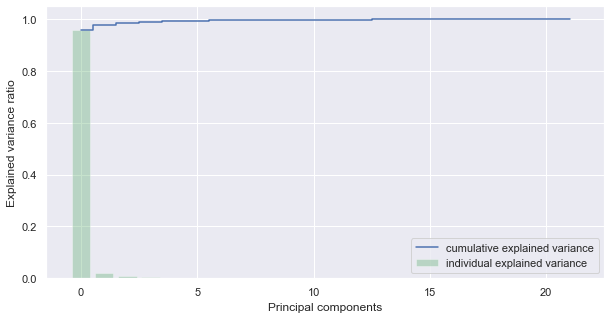

Cumulative explained ratio: [0.95952774 0.97827172 0.98595769 0.98980765 0.99262285 0.99479384
 0.99635285 0.99766481 0.99830871 0.99881862 0.99916402 0.99936096
 0.99953323 0.9996523  0.99973293 0.99980856 0.99987079 0.99991464
 0.99994434 0.99996987 0.99998527 1.        ]


In [595]:
# Visualisasi Data Original PCA
cum_var_ratio = np.cumsum(var_ratio)

plt.figure(figsize=(10, 5))
plt.bar(range(len(var_ratio)), 
        var_ratio, 
        alpha=0.3333, 
        align='center', 
        label='individual explained variance', 
        color = 'g')
plt.step(range(len(cum_var_ratio)),
         cum_var_ratio, 
         where='mid',
         label='cumulative explained variance')
plt.ylabel('Explained variance ratio')
plt.xlabel('Principal components')
plt.legend(loc='best')
plt.show()

print("Cumulative explained ratio:",cum_var_ratio)

In [596]:
X_train_pca, X_test_pca, Y_train_pca, Y_test_pca = train_test_split(ori_pca,y, test_size=0.3, random_state=2022)

# Data Normalisasi PCA

In [597]:
pca = PCA(random_state=2022)
pca.fit(X_norm)
norm_pca_array = pca.transform(X_norm)
norm_pca = pd.DataFrame(norm_pca_array)
print("Heads of iris_pca:",norm_pca.head())
var_ratio = pca.explained_variance_ratio_
print("\n Explained variance ratio:",var_ratio)
sv = pca.singular_values_
print("\n Singular Value:",sv)

Heads of iris_pca:          0         1         2         3         4         5         6   \
0 -0.414469 -0.548357  0.475909 -0.418395  0.115352 -0.216479  1.011307   
1  0.337055  0.727056  0.178469  1.364411  1.835782 -0.259117  1.151643   
2 -0.106388 -0.688238  0.293944  0.558417 -0.631514  0.022780  0.717992   
3  0.052428  1.277346  0.439471  1.024404  1.281361 -0.540878  0.276384   
4 -0.846475  0.388848  0.797194  0.701083 -2.162484 -0.915453  0.278635   

         7         8         9   ...        12        13        14        15  \
0  2.007309  0.473438  0.594925  ... -0.825405 -0.449514  1.138246  0.157828   
1  1.167315 -0.230751 -0.202019  ... -0.909061  1.655684 -0.014062  1.069987   
2 -0.441208  0.031178 -0.433482  ...  0.460205  1.809652 -1.291473  0.317780   
3  2.334975 -0.549037  0.658895  ... -1.511398  1.216756  1.149223  0.707238   
4 -1.276636 -1.761232 -0.371055  ...  0.407495  0.342832  0.108747  0.440390   

         16        17        18        19        

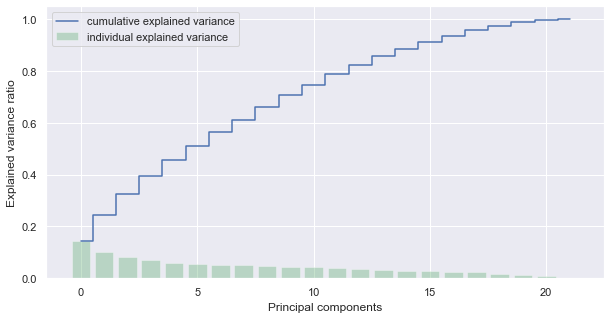

Cumulative explained ratio: [0.14213805 0.24463664 0.32629041 0.39680148 0.45623309 0.51189369
 0.56333373 0.6126902  0.66129641 0.70662637 0.74839338 0.78736027
 0.82460445 0.85715362 0.88645713 0.91273397 0.93642487 0.95883872
 0.97619513 0.98878042 0.99829271 1.        ]


In [599]:
# Visualisasi Data Normalisasi PCA
cum_var_ratio = np.cumsum(var_ratio)

plt.figure(figsize=(10, 5))
plt.bar(range(len(var_ratio)), 
        var_ratio, 
        alpha=0.3333, 
        align='center', 
        label='individual explained variance', 
        color = 'g')
plt.step(range(len(cum_var_ratio)),
         cum_var_ratio, 
         where='mid',
         label='cumulative explained variance')
plt.ylabel('Explained variance ratio')
plt.xlabel('Principal components')
plt.legend(loc='best')
plt.show()

print("Cumulative explained ratio:",cum_var_ratio)

In [600]:
X_train_norm_pca, X_test_norm_pca, Y_train_norm_pca, Y_test_norm_pca = train_test_split(norm_pca,y, test_size=0.3, random_state=2022)

# 7) Menentukan Label Data

- Tidak perlu karena label data sudah tersedia pada data

# 8) Membangun Model
- Teknik Pemodelan yang dipakai:
    - Menggunakan KNN
    - Parameter yang dipakai:
        - n_neighbors = 3
        - metric = euclidean
        - p = 2
- Skenario Pengujian
    - Menggunakan akurasi, presisi dan recall.
    - Pengujian menggunakan Data Original.
    - Pengujian menggunakan Data yang sudah dinormalisasi.
    - Pengujian menggunakan Data Original yang diberikan PCA.
    - Pengujian menggunakan Data yang sudah dinormalisasi dan diberikan PCA.

# K-Nearets Neighbors

# Pemodelan K-Nearest Neighbor (KNN)

# Pemodelan dengan Data Original

In [601]:
ori_classifier = KNeighborsClassifier(n_neighbors=3, metric='euclidean', p=2)

In [602]:
ori_classifier.fit(X_train,Y_train.ravel())

KNeighborsClassifier(metric='euclidean', n_neighbors=3)

# Pemodelan K-Nearest Neighbors (KNN) dengan Data Normalisasi

In [603]:
norm_classifier = KNeighborsClassifier(n_neighbors=3, metric='euclidean', p=2)

In [605]:
norm_classifier.fit(X_train_norm,Y_train_norm.ravel())

KNeighborsClassifier(metric='euclidean', n_neighbors=3)

# Pemodelan K-Nearest Neighbors (KNN) Data Original tapi diberikan PCA


In [606]:
ori_pca_classifier = KNeighborsClassifier(n_neighbors=3, metric='euclidean', p=2)

In [607]:
ori_pca_classifier.fit(X_train_pca,Y_train_pca.ravel())

KNeighborsClassifier(metric='euclidean', n_neighbors=3)

# Pemodelan K-Nearest Neighbors (KNN) dengan Data Normalisasi tapi diberikan PCA

In [608]:
norm_pca_classifier = KNeighborsClassifier(n_neighbors=3, metric='euclidean', p=2)

In [609]:
norm_pca_classifier.fit(X_train_norm_pca,Y_train_norm_pca.ravel())

KNeighborsClassifier(metric='euclidean', n_neighbors=3)

# 9) Mengevaluasi Hasil Pemodelan

# Evaluasi Dengan Data Original

In [610]:
ori_y_pred_train = ori_classifier.predict(X_train)

ori_accuracy_train = accuracy_score(Y_train,ori_y_pred_train)
print('Akurasi pada training set: ', ori_accuracy_train)

ori_precision_train = precision_score(Y_train,ori_y_pred_train, average='micro')
print('Precision pada training set: ', ori_precision_train)

ori_recall_train = recall_score(Y_train,ori_y_pred_train, average='micro')
print('Recall pada training set: ', ori_recall_train)

ori_y_pred_test = ori_classifier.predict(X_test)

ori_accuracy_test = accuracy_score(Y_test,ori_y_pred_test)
print('Akurasi pada test set: ', ori_accuracy_test)

ori_precision_test = precision_score(Y_test,ori_y_pred_test, average='micro')
print('Precision pada test set: ', ori_precision_test)

ori_recall_test = recall_score(Y_test,ori_y_pred_test, average='micro')
print('Recall pada test set: ', ori_recall_test)

Akurasi pada training set:  0.8218181818181818
Precision pada training set:  0.8218181818181818
Recall pada training set:  0.8218181818181818
Akurasi pada test set:  0.7478991596638656
Precision pada test set:  0.7478991596638656
Recall pada test set:  0.7478991596638656


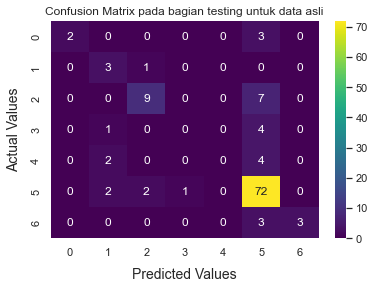

In [611]:
# Visualisasi Confusion Matrix dengan Seaborn
sns.heatmap(confusion_matrix(Y_test,ori_y_pred_test),annot=True,cmap='viridis', fmt='.0f')
plt.xlabel('Predicted Values', fontdict={'size':14}, labelpad=10)
plt.ylabel('Actual Values', fontdict={'size':14}, labelpad=10)
plt.title('Confusion Matrix pada bagian testing untuk data asli')
plt.show()

# Evaluasi dengan Data Normalisasi

In [612]:
norm_y_pred_train = norm_classifier.predict(X_train_norm)

norm_accuracy_train = accuracy_score(Y_train_norm,norm_y_pred_train)
print('Akurasi pada training set: ', norm_accuracy_train)

norm_precision_train = precision_score(Y_train_norm,norm_y_pred_train, average='micro')
print('Precision pada training set: ', norm_precision_train)

norm_recall_train = recall_score(Y_train_norm,norm_y_pred_train, average='micro')
print('Recall pada training set: ', norm_recall_train)

norm_y_pred_test = norm_classifier.predict(X_test_norm)

norm_accuracy_test = accuracy_score(Y_test_norm,norm_y_pred_test)
print('Akurasi pada test set: ', norm_accuracy_test)

norm_precision_test = precision_score(Y_test_norm,norm_y_pred_test, average='micro')
print('Precision pada test set: ', norm_precision_test)

norm_recall_test = recall_score(Y_test_norm,norm_y_pred_test, average='micro')
print('Recall pada test set: ', norm_recall_test)

Akurasi pada training set:  0.9272727272727272
Precision pada training set:  0.9272727272727272
Recall pada training set:  0.9272727272727272
Akurasi pada test set:  0.8739495798319328
Precision pada test set:  0.8739495798319328
Recall pada test set:  0.8739495798319328


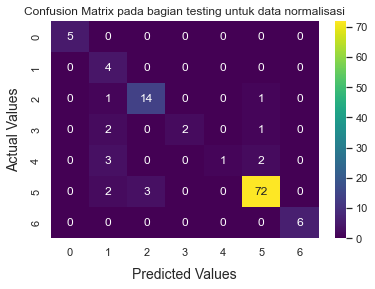

In [613]:
# Visualisasi Confusion Matrix dengan Seaborn
sns.heatmap(confusion_matrix(Y_test_norm,norm_y_pred_test),annot=True,cmap='viridis', fmt='.0f')
plt.xlabel('Predicted Values', fontdict={'size':14}, labelpad=10)
plt.ylabel('Actual Values', fontdict={'size':14}, labelpad=10)
plt.title('Confusion Matrix pada bagian testing untuk data normalisasi')
plt.show()

# Evaluasi PCA dengan Data Original

In [614]:
ori_pca_y_pred_train = ori_pca_classifier.predict(X_train_pca)

ori_pca_accuracy_train = accuracy_score(Y_train_pca,ori_pca_y_pred_train)
print('Akurasi pada training set: ', ori_pca_accuracy_train)

ori_pca_precision_train = precision_score(Y_train_pca,ori_pca_y_pred_train, average='micro')
print('Precision pada training set: ', ori_pca_precision_train)

ori_pca_recall_train = recall_score(Y_train_pca,ori_pca_y_pred_train, average='micro')
print('Recall pada training set: ', ori_pca_recall_train)

ori_pca_y_pred_test = ori_pca_classifier.predict(X_test_pca)

ori_pca_accuracy_test = accuracy_score(Y_test_pca,ori_pca_y_pred_test)
print('Akurasi pada test set: ', ori_pca_accuracy_test)

ori_pca_precision_test = precision_score(Y_test_pca,ori_pca_y_pred_test, average='micro')
print('Precision pada test set: ', ori_pca_precision_test)

ori_pca_recall_test = recall_score(Y_test_pca,ori_pca_y_pred_test, average='micro')
print('Recall pada test set: ', ori_pca_recall_test)

Akurasi pada training set:  0.8181818181818182
Precision pada training set:  0.8181818181818182
Recall pada training set:  0.8181818181818182
Akurasi pada test set:  0.7226890756302521
Precision pada test set:  0.7226890756302521
Recall pada test set:  0.7226890756302521


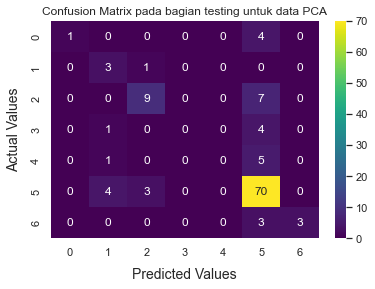

In [616]:
# Visualisasi Confusion Matrix dengan Seaborn
sns.heatmap(confusion_matrix(Y_test_pca,ori_pca_y_pred_test),annot=True,cmap='viridis', fmt='.0f')
plt.xlabel('Predicted Values', fontdict={'size':14}, labelpad=10)
plt.ylabel('Actual Values', fontdict={'size':14}, labelpad=10)
plt.title('Confusion Matrix pada bagian testing untuk data PCA')
plt.show()

# Evaluasi Data Normalisasi dengan PCA

In [617]:
norm_pca_y_pred_train = norm_pca_classifier.predict(X_train_norm_pca)

norm_pca_accuracy_train = accuracy_score(Y_train_norm_pca,norm_pca_y_pred_train)
print('Akurasi pada training set: ', norm_pca_accuracy_train)

norm_pca_precision_train = precision_score(Y_train_norm_pca,norm_pca_y_pred_train, average='micro')
print('Precision pada training set: ', norm_pca_precision_train)

norm_pca_recall_train = recall_score(Y_train_norm_pca,norm_pca_y_pred_train, average='micro')
print('Recall pada training set: ', norm_pca_recall_train)

norm_pca_y_pred_test = norm_pca_classifier.predict(X_test_norm_pca)

norm_pca_accuracy_test = accuracy_score(Y_test_norm_pca,norm_pca_y_pred_test)
print('Akurasi pada test set: ', norm_pca_accuracy_test)

norm_pca_precision_test = precision_score(Y_test_norm_pca,norm_pca_y_pred_test, average='micro')
print('Precision pada test set: ', norm_pca_precision_test)

norm_pca_recall_test = recall_score(Y_test_norm_pca,norm_pca_y_pred_test, average='micro')
print('Recall pada test set: ', norm_pca_recall_test)

Akurasi pada training set:  0.9236363636363636
Precision pada training set:  0.9236363636363636
Recall pada training set:  0.9236363636363636
Akurasi pada test set:  0.8739495798319328
Precision pada test set:  0.8739495798319328
Recall pada test set:  0.8739495798319328


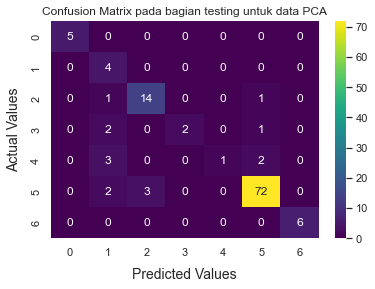

In [619]:
# Visualisasi Confusion Matrix dengan Seaborn
sns.heatmap(confusion_matrix(Y_test_norm_pca,norm_pca_y_pred_test),annot=True,cmap='viridis', fmt='.0f')
plt.xlabel('Predicted Values', fontdict={'size':14}, labelpad=10)
plt.ylabel('Actual Values', fontdict={'size':14}, labelpad=10)
plt.title('Confusion Matrix pada bagian testing untuk data PCA')
plt.show()

# 11) Melakukan Proses Review Pemodelan

In [620]:
models = [
          ('KNN Data Original', ori_accuracy_train, ori_accuracy_test),
          ('KNN Data Normalisasi', norm_accuracy_train, norm_accuracy_test),
          ('KNN PCA Data Original', ori_pca_accuracy_train, ori_pca_accuracy_test),    
          ('KNN PCA Data Normalisasi', norm_pca_accuracy_train, norm_pca_accuracy_test),      
         ]

In [621]:
# Melakukan perbandingan hasil training akurasi dan test akurasi dengan 4 model
predict = pd.DataFrame(data = models, columns=['Model', 'Training Accuracy', 'Test Accuracy'])
predict

,Model,Training Accuracy,Test Accuracy
0,KNN Data Original,0.821818,0.747899
1,KNN Data Normalisasi,0.927273,0.873950
2,KNN PCA Data Original,0.818182,0.722689
3,KNN PCA Data Normalisasi,0.923636,0.873950


In [622]:
models_comparison = [
                        ('KNN Data Original', ori_accuracy_test, ori_recall_test, ori_precision_test), 
                        ('KNN Data Normalisasi', norm_accuracy_test, norm_recall_test, norm_precision_test),
                        ('KNN PCA Data Original', ori_pca_accuracy_test, ori_pca_recall_test, ori_pca_precision_test),
                        ('KNN PCA Data Normalisasi', norm_pca_accuracy_test, norm_pca_recall_test, norm_pca_precision_test),                  
                    ]

In [623]:
# Melakukan perbandingan hasil Akurasi, Presisi dan Recall pada data Testing dengan 4 model
comparison = pd.DataFrame(data = models_comparison, columns=['Model', 'Accuracy', 'Recall', 'Precision'])
comparison

,Model,Accuracy,Recall,Precision
0,KNN Data Original,0.747899,0.747899,0.747899
1,KNN Data Normalisasi,0.873950,0.873950,0.873950
2,KNN PCA Data Original,0.722689,0.722689,0.722689
3,KNN PCA Data Normalisasi,0.873950,0.873950,0.873950


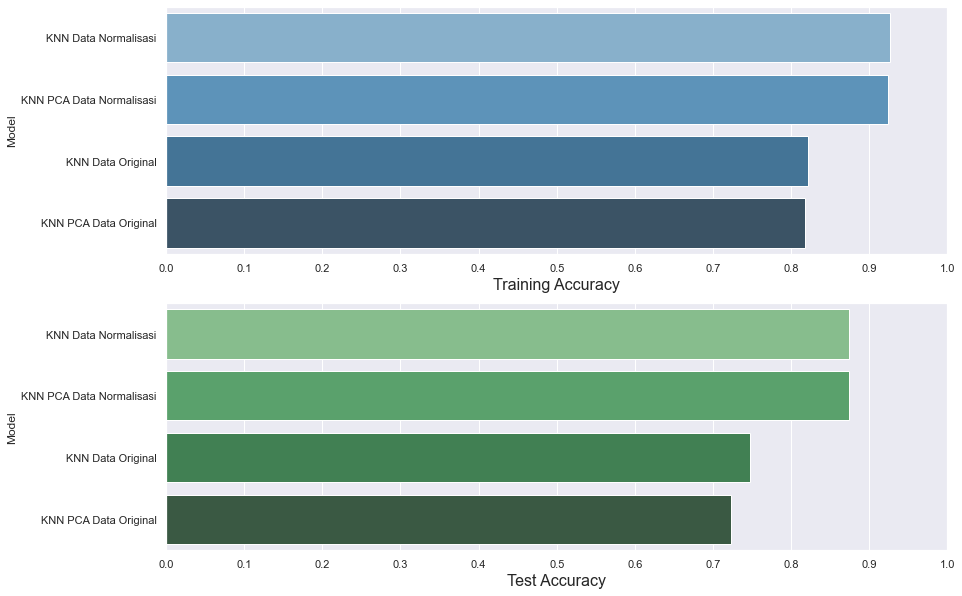

In [624]:
# Visualisasi Perbandingan 4 model dengan Seaborn

f, axes = plt.subplots(2,1, figsize=(14,10))

predict.sort_values(by=['Training Accuracy'], ascending=False, inplace=True)

sns.barplot(x='Training Accuracy', y='Model', data = predict, palette='Blues_d', ax = axes[0])
#axes[0].set(xlabel='Region', ylabel='Charges')
axes[0].set_xlabel('Training Accuracy', size=16)
axes[0].set_ylabel('Model')
axes[0].set_xlim(0,1.0)
axes[0].set_xticks(np.arange(0, 1.1, 0.1))

predict.sort_values(by=['Test Accuracy'], ascending=False, inplace=True)

sns.barplot(x='Test Accuracy', y='Model', data = predict, palette='Greens_d', ax = axes[1])
#axes[0].set(xlabel='Region', ylabel='Charges')
axes[1].set_xlabel('Test Accuracy', size=16)
axes[1].set_ylabel('Model')
axes[1].set_xlim(0,1.0)
axes[1].set_xticks(np.arange(0, 1.1, 0.1))

plt.show()

# Kesimpulan :
- Model terbaik dari Dataset Data for Migraine Classification dengan menggunakan algoritma KNN adalah data KNN Data Normalisasi dengan nilai akurasi tertinggi pada Data Training sebesar 92.72% dan akurasi tertinggi pada Data Testing sebesar 87.39% sama besarnya dengan KNN PCA Data Normalisasi.